In [4]:
#imports and uploding data

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, f1_score

#matplotlib magic
%matplotlib inline

#importing data
df = pd.read_csv('titanic.csv', index_col='PassengerId')

Задание 1 (1 балл):
Загрузить titanic.csv. Нарисовать диаграммы (гистограммы/круговые/...), по которым можно будет сравнить 
1) вероятность выжить для мужчин и женщин, 
2) вероятность выжить для пассажиров разных социально-экономических классов (Pclass), 
3) стоимость билета в зависимости от социально-экономического класса. 
Написать, что вам удалось узнать из этих диаграмм (например, «для пассажира 1 класса вероятность выжить составила XX% и оказалась выше, чем у пассажира 2 класса (YY%)»; чем больше информации вы сможете извлечь из диаграмм, тем лучше)

Ответ:
Вероятность выжить для женщин (более 70%) была значиетльно выше вероятности выжить для мужчин (менее 20%)
Вероятность выжить для пассажиров первого и второго класса была значительно выше, чем для пасажиров 3 класса (около 25%), при этом путешествовавших 3 классом было почти в 2 раза больше, чем представителей первого или второго класса. В сво очередь у предствителей 1 класса шанс выжить был выше (около 60%), чем у представителей второго класса (около 40%).
Сильно выделяеся цена для первого класса, которая могла превышать цену для второго или третьего более чем в 5 раз.
Удивительно, что цна для второго и тертьего класса не так сильно разнилась, на графике расперделение точек почти не отличается.

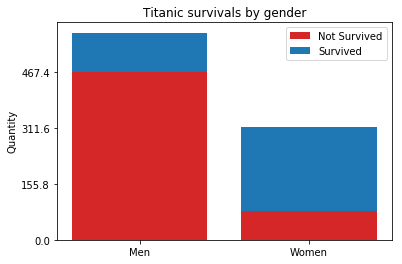

In [5]:
Surv = [len(df[(df.Sex == 'male') & (df.Survived == 1)]), len(df[(df.Sex == 'female') & (df.Survived == 1)])]
NoSurv = [len(df[(df.Sex == 'male') & (df.Survived == 0)]), len(df[(df.Sex == 'female') & (df.Survived == 0)])]


plt.figure()

ind = np.arange(2) 
width = 0.8 

p1 = plt.bar(ind, NoSurv, width, color='#d62728')
p2 = plt.bar(ind, Surv, width, bottom=NoSurv)

plt.ylabel('Quantity')
plt.title('Titanic survivals by gender')
plt.xticks(ind, ('Men', 'Women'))
plt.yticks(np.arange(0, Surv[0]+NoSurv[0], Surv[0]+NoSurv[0]/10))
plt.legend((p1[0], p2[0]), ('Not Survived', 'Survived'))

plt.show()

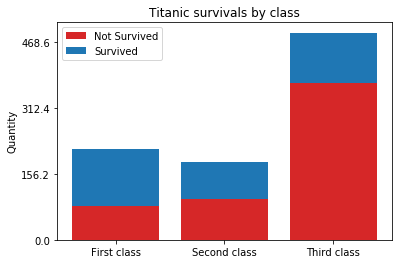

In [6]:
Surv = [len(df[(df.Pclass == 1) & (df.Survived == 1)]), 
        len(df[(df.Pclass == 2) & (df.Survived == 1)]),
        len(df[(df.Pclass == 3) & (df.Survived == 1)])]
NoSurv = [len(df[(df.Pclass == 1) & (df.Survived == 0)]), 
          len(df[(df.Pclass == 2) & (df.Survived == 0)]),
          len(df[(df.Pclass == 3) & (df.Survived == 0)])]


plt.figure()

ind = np.arange(3) 
width = 0.8 

p1 = plt.bar(ind, NoSurv, width, color='#d62728')
p2 = plt.bar(ind, Surv, width, bottom=NoSurv)

plt.ylabel('Quantity')
plt.title('Titanic survivals by class')
plt.xticks(ind, ('First class', 'Second class', 'Third class'))
plt.yticks(np.arange(0, Surv[2]+NoSurv[2], Surv[2]+NoSurv[2]/10))
plt.legend((p1[0], p2[0]), ('Not Survived', 'Survived'))

plt.show()

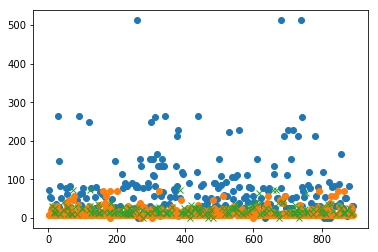

In [7]:
first = df[df.Pclass == 1]
second = df[df.Pclass == 2]
third = df[df.Pclass == 3]

plt.figure()

p1 = plt.plot(first['Fare'], 'o')
p3 = plt.plot(third['Fare'], 'o')
p2 = plt.plot(second['Fare'], 'x')

plt.show()

Заданние 2 (два балла): 
А теперь нарисуем два предиктора на одной диаграмме. Нарисовать гистограмму, описывающую среднюю вероятность выжить в зависимости от пола и соц. статуса. Например, это может быть гистограмма с тремя группами столбцов (разделение по соц.статусу), в которой высота столбца соответствует среднему числу выживших, а цвет столбца обозначает пол пассажиров. Снова интерпретировать результаты (Например, какова вероятность выжить женщине из первого класса?). Записать любые два утверждения в виде формул (нужно вспомнить, что такое совместная и/или условная вероятность).

Ответ:

P(S|(w && fc)) > P(S|(w && sc)) > P(S|(w && tc)) > P(S|(m && fc))

P(S|w) > P(S|m)

Обозначния:
&& - объединие
S - survive, w - women, f\s\t c - first\second\third class

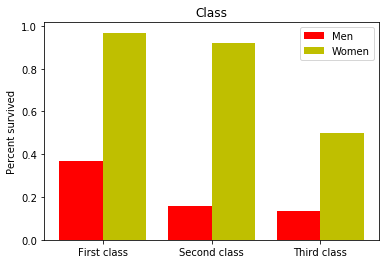

In [8]:
#выделяем кол-во выживших мужчин разного класса и делим на к-во мужчин данного класса. 
#получаем массив вероятностей выжить для мужчин

Surv_male = [len(df[(df.Pclass == 1) & (df.Survived == 1) & (df.Sex == 'male')])/
             len(df[(df.Pclass == 1) & (df.Sex == 'male')]), 
             len(df[(df.Pclass == 2) & (df.Survived == 1) & (df.Sex == 'male')])/
             len(df[(df.Pclass == 2) & (df.Sex == 'male')]),
             len(df[(df.Pclass == 3) & (df.Survived == 1) & (df.Sex == 'male')])/
             len(df[(df.Pclass == 3) & (df.Sex == 'male')])]

#аналогично для женщин

Surv_female = [len(df[(df.Pclass == 1) & (df.Survived == 1) & (df.Sex == 'female')])/
             len(df[(df.Pclass == 1) & (df.Sex == 'female')]), 
             len(df[(df.Pclass == 2) & (df.Survived == 1) & (df.Sex == 'female')])/
             len(df[(df.Pclass == 2) & (df.Sex == 'female')]),
             len(df[(df.Pclass == 3) & (df.Survived == 1) & (df.Sex == 'female')])/
             len(df[(df.Pclass == 3) & (df.Sex == 'female')])]


plt.figure()

ind = np.arange(3)
width = 0.4

rects1 = plt.bar(ind, Surv_male, width, color='r')

rects2 = plt.bar(ind + width, Surv_female, width, color='y')

# add some text for labels, title and axes ticks
plt.ylabel('Percent survived')
plt.title('Class')
plt.xticks(ind + width / 2, ('First class', 'Second class', 'Third class'))

plt.legend((rects1, rects2), ('Men', 'Women'))

plt.show()

Задание 3 (два балла):
Почистите данные так, как считаете нужным (не забывайте про коварную переменную Sex; постарайтесь не удалять строки). Extra: сможете ли вы использовать не 4 столбца, а больше? Например, кажется, что если ребёнок ехал с братом/сестрой, то их не разлучат, а посадят вместе в шлюпку, и они выживут...

In [9]:
from statistics import median

x_labels = ['Pclass', 'Fare', 'Age', 'Sex','Embarked', 'Parch', 'SibSp', 'Survived']
X = df[x_labels]

print(len(X[pd.isnull(X.Age)]))

hlp = X[X.Age.notnull()]

X.fillna(median(hlp['Age'].tolist()), inplace=True)
print(None in X)

177
False


/Users/Ksenia/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Задание 4 (два балла):
Разделить данные на обучающую и проверочную выборки (или использовать кросс-валидацию). Будем строить дерево решений. Нужно выбрать параметр модели, который, на ваш взгляд, может повлиять на результат, и выбрать для него возможные значения. Прокомментировать свой выбор. Изменяя в цикле значения параметра, посчитать для каждого случая точноть, полноту, F-меру (может быть, другие метрики?). Изобразить результаты на диаграмме/-ах. Интерпретировать результаты. Нарисовать лучшее дерево.

Extra: варьировать не в цикле, а использовать grid search.
Super–duper-Extra: построить ROC-кривую и написать свою интерпретацию того, что эта диаграмма говорит о модели.


In [15]:
#трансформирем "SEX" в числовую еременную
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
X['Sex'] = lb.fit_transform(X['Sex'])

#all possible features
colds = ['Pclass', 'Fare', 'Age', 'Sex', 'Embarked', 'Parch', 'SibSp']
#features we use ('Parch', 'SibSp' dropp the accuracy)
cols = ['Pclass', 'Fare', 'Age', 'Sex']

#parameters of the model, that we will fit; Tried different ones, theese gives best fitting
parameters = [
    {'min_samples_split': range(2,10), 'max_features': range(1,4), 'min_samples_leaf': range(1,5)}
]

#divide features from answers
labels = X["Survived"].values
features = X[list(cols)].values

#classifier we use
dtc = DecisionTreeClassifier()

#grid search model to scroll parameters
clf = GridSearchCV(dtc, parameters, n_jobs=-1)

#arays to stock answers
y_pred = []
y_true = []

#cross-validation model
skf = StratifiedKFold(n_splits=3)

#loop that fits the grid search model using clross-validation
for train, test in skf.split(features, labels):
    clf.fit(features[train], labels[train])
    #colect answers
    y_pred = np.append(y_pred, clf.predict(features[test]))
    y_true = np.append(y_true, labels[test])

#print firs estimation of accuracy of the model
classif_rate = np.mean(y_pred == y_true) * 100
print("Classification rate : %f" % classif_rate)

#print report
target_names = ('Dead', 'Survived')
print(classification_report(y_true, y_pred, target_names=target_names))

print(f1_score(y_true, y_pred, average='weighted'))

print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

/Users/Ksenia/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Classification rate : 79.461279
             precision    recall  f1-score   support

       Dead       0.81      0.87      0.84       549
   Survived       0.77      0.67      0.71       342

avg / total       0.79      0.79      0.79       891

0.791593967958
Grid scores on development set:

0.751 (+/-0.039) for {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.756 (+/-0.042) for {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.766 (+/-0.021) for {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.764 (+/-0.041) for {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.758 (+/-0.049) for {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.788 (+/-0.036) for {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 7}
0.753 (+/-0.014) for {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 8}
0.795 (+/-0.034) for {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 9}
0

5 (+2). Проделать аналогичные операции для модели Random Forest. Сравнить результаты.

Рандом Форест обучается (насколько я поняла из результатов GRID SCORES). 
Насколько можно судить из GRID SCORES сильного отлчия от Дерева решений сильного не будет, может на 1-2% улучшится точность предсказани
Не успела разобраться, почему цикл с кросс валидацией не записывает ответы

In [16]:
#mostly same code as for prev classifier

parameters = [
    {'min_samples_split': range(2,10), 'max_features': range(1,4), 'min_samples_leaf': range(1,5)}
]


rfc = RandomForestClassifier()

clf_2 = GridSearchCV(rfc, parameters, n_jobs=-1)

y_pred_rf = []
y_true_rf = []

skf = StratifiedKFold(n_splits=3)

for train, test in skf.split(features, labels):
    clf_2.fit(features[train], labels[train])
    y_pred = np.append(y_pred_rf, clf_2.predict(features[test]))
    y_true = np.append(y_true_rf, labels[test])
    
classif_rate = np.mean(y_pred_rf == y_true_rf) * 100
print("Classification rate : %f" % classif_rate)

target_names = ('Dead', 'Survived')

print(y_true_rf, y_pred_rf)
print(f1_score(y_true_rf, y_pred_rf, average='weighted'))

print("Best parameters set found on development set:")
print(clf_2.best_estimator_)


print("Grid scores on development set:")
print()
means = clf_2.cv_results_['mean_test_score']
stds = clf_2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Classification rate : 100.000000
[] []
0
Best parameters set found on development set:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Grid scores on development set:

0.798 (+/-0.057) for {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.806 (+/-0.048) for {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.813 (+/-0.014) for {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.806 (+/-0.039) for {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.800 (+/-0.070) for {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.801 (+/-0.067) for {'max_features': 1, 'min_samples_leaf': 1

In [22]:
#not working attempt to plot tree

from sklearn import tree
from IPython.display import Image
import pydotplus


clf_best = DecisionTreeClassifier(min_samples_leaf = 8)
clf_best.fit(features[train], labels[train])
dot_data = tree.export_graphviz(clf_best, out_file=None, feature_names = x_labels, class_names = ['Survived' , 'Not survived'],
                               filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: Program terminated with status: -5. stderr follows: dyld: Library not loaded: /usr/lib/libltdl.7.dylib
  Referenced from: /usr/local/bin/dot
  Reason: image not found


In [216]:
clf

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'min_samples_split': range(2, 10), 'max_features': range(1, 4), 'min_samples_leaf': range(1, 5)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)